# **Billionaire Index**

### The top 500 billionaires of the world

In [1]:
#the below code is for bringing my dataset into jupyter labs and get a feel of what the data is about

import pandas as pd #use pandas library for the csv file analysis
import numpy as np #to process the data
import matplotlib.pyplot as plt
import seaborn as sns # for visuals
import statsmodels.api as sm # this is for regression
df = pd.read_csv('BillionairesIndex.csv')
df.head(500)

,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
0,Elon Musk,$311B,+$9.32B,+$141B,UnitedStates,Technology
1,Jeff Bezos,$195B,-$3.79B,+$5.06B,UnitedStates,Technology
2,Bernard Arnault,$167B,-$544M,+$52.7B,France,Consumer
3,Bill Gates,$136B,+$906M,+$4.40B,UnitedStates,Technology
4,Larry Page,$131B,+$1.71B,+$48.7B,UnitedStates,Technology
...,...,...,...,...,...,...
495,Barry Diller,$5.92B,-$73.5M,+$366M,UnitedStates,Technology
496,Cliff Obrecht,$5.89B,$0,+$4.99B,Australia,Services
497,Melanie Perkins,$5.89B,$0,+$4.99B,Australia,Services
498,Trevor Rees-Jones,$5.89B,-$106M,+$898M,UnitedStates,Energy


## **Data cleaning**

In [2]:
#Just to avoid changing the original dataset, I wanted to create another copy as DF1 to clean my dataset
df1 = df.copy()

In [3]:
#Basic information about dataset for cleaning
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             500 non-null    object
 1   Total_Net_Worth  500 non-null    object
 2   LastChange       500 non-null    object
 3   YTDChange        500 non-null    object
 4   Country          500 non-null    object
 5   Industry         500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [4]:
#the below provides the rows and columns respectively
df1.shape

(500, 6)

In [5]:
#One more step before I continue my analysis, I wanted to rename my columns for readability purpose, in this case I will be renaming the 'Total_Net_Worth''LastChange''YTDChange' columns
df1.rename (columns= {'Total_Net_Worth': 'Total_Net_Worth_Billions(USD)', 'LastChange':'LastChange_Billions(USD)','YTDChange':'YTDChange_Billions(USD)'}, inplace=True) # the columns to be renamed
df1

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,$311B,+$9.32B,+$141B,UnitedStates,Technology
1,Jeff Bezos,$195B,-$3.79B,+$5.06B,UnitedStates,Technology
2,Bernard Arnault,$167B,-$544M,+$52.7B,France,Consumer
3,Bill Gates,$136B,+$906M,+$4.40B,UnitedStates,Technology
4,Larry Page,$131B,+$1.71B,+$48.7B,UnitedStates,Technology
...,...,...,...,...,...,...
495,Barry Diller,$5.92B,-$73.5M,+$366M,UnitedStates,Technology
496,Cliff Obrecht,$5.89B,$0,+$4.99B,Australia,Services
497,Melanie Perkins,$5.89B,$0,+$4.99B,Australia,Services
498,Trevor Rees-Jones,$5.89B,-$106M,+$898M,UnitedStates,Energy


In [6]:
# Now I am also looking to clean the 'Total_Net_Worth' column by taking off the '$' and 'B'

df1['Total_Net_Worth_Billions(USD)'] = df1['Total_Net_Worth_Billions(USD)'].map(lambda x: x.lstrip('$')) # this code refers to taking off the "$"
df1['Total_Net_Worth_Billions(USD)'] = df1['Total_Net_Worth_Billions(USD)'].map(lambda x: x.rstrip('B')) # this code refers to taking off the "B"
df1

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311,+$9.32B,+$141B,UnitedStates,Technology
1,Jeff Bezos,195,-$3.79B,+$5.06B,UnitedStates,Technology
2,Bernard Arnault,167,-$544M,+$52.7B,France,Consumer
3,Bill Gates,136,+$906M,+$4.40B,UnitedStates,Technology
4,Larry Page,131,+$1.71B,+$48.7B,UnitedStates,Technology
...,...,...,...,...,...,...
495,Barry Diller,5.92,-$73.5M,+$366M,UnitedStates,Technology
496,Cliff Obrecht,5.89,$0,+$4.99B,Australia,Services
497,Melanie Perkins,5.89,$0,+$4.99B,Australia,Services
498,Trevor Rees-Jones,5.89,-$106M,+$898M,UnitedStates,Energy


In [7]:
#for the below code I am looking to replace certain characters like the $, M, K and B
def change(df1, col):
    df1[col] = df1[col].replace({'\$':''}, regex =  True) # this is for replacing the the "$" figure to blank

def clear(x):
    if 'M' in x:
        return float(x.rstrip('M')) / 1000 # this is replace figures ending with "M"(which is millions) by dividing it by a thousand
    elif 'k' in x:
        return float(x.rstrip('k')) / 10 ** 6 # this is replace figures ending with "K"(which is thousand) by dividing it by a million
    else:
        return float(x.rstrip('B')) #return the figures as normal if ending with "B"

change(df1, 'LastChange_Billions(USD)') # this is referring to the column I am trying to change
df1['LastChange_Billions(USD)'] = df1['LastChange_Billions(USD)'].apply(clear)

In [8]:
#for the below code I am looking to replace certain characters
def change(df1, col):
    df1[col] = df1[col].replace({'\$':''}, regex =  True) # this is for replacing the the "$" figure to blank

def clear(x):
    if 'M' in x:
        return float(x.rstrip('M')) / 1000 #this is replace figures ending with "M"(which is millions) by dividing it by a thousand
    elif 'k' in x:
        return float(x.rstrip('k')) / 10 ** 6 # this is replace figures ending with "K"(which is thousand) by dividing it by a million
    else:
        return float(x.rstrip('B')) #return the figures as normal if ending with "B"

change(df1, 'YTDChange_Billions(USD)')
df1['YTDChange_Billions(USD)'] = df1['YTDChange_Billions(USD)'].apply(clear) # this is referring to the column I am trying to change

In [9]:
#Changing the below columns from object to float for my data exploration

df1['Total_Net_Worth_Billions(USD)'] = df1['Total_Net_Worth_Billions(USD)'].astype(float)
df1['LastChange_Billions(USD)'] = df1['LastChange_Billions(USD)'].astype(float)
df1['YTDChange_Billions(USD)'] = df1['YTDChange_Billions(USD)'].astype(float)

In [10]:
# the below will ascertain that I did convert the required columns to float

df1.dtypes

Name                              object
Total_Net_Worth_Billions(USD)    float64
LastChange_Billions(USD)         float64
YTDChange_Billions(USD)          float64
Country                           object
Industry                          object
dtype: object

## **Data Exploration**

In [11]:
#Which industries are on the list

Industry = df1['Industry'].unique()
print(Industry)

['Technology' 'Consumer' 'Diversified' 'Energy' 'Industrial' 'Retail'
 'Food&Beverage' 'Finance' 'Commodities' 'Real Estate' 'Entertainment'
 'Health Care' 'Media&Telecom' ' Media&Telecom' 'Services' 'Islands']


In [12]:
# the below code is for Counting the number of billionaires in the technology industry which are 87

print(df['Industry'].value_counts()['Technology'])

87


In [36]:
# the below pivot table function will count the number of billionaires in every industry and we can clearly see that in the technology is leading
IndustryCount = df.groupby('Industry').size().sort_values(ascending=False).to_frame()
IndustryCount.columns = ['Count']
IndustryCount

,Count
Industry,
Technology,87
Industrial,57
Finance,55
Diversified,45
Consumer,39
Real Estate,33
Retail,32
Food&Beverage,30
Health Care,30


The above table shows that the majority of the top billionaires of the world are from the technology business as their source of wealth

In [14]:
#Checking for duplicates
df1.duplicated().value_counts()

False    500
dtype: int64

**The above table does do provide me with the output I want but it shows that cleaning is required because of the letter B and M that needs to be replaced so that I am not misleading with this data and The above table now shows that I was able to successfully clean the 'LastChange' column**

In [15]:
df1 #to recheck that my below data has been cleaned

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.00,9.3200,141.000,UnitedStates,Technology
1,Jeff Bezos,195.00,-3.7900,5.060,UnitedStates,Technology
2,Bernard Arnault,167.00,-0.5440,52.700,France,Consumer
3,Bill Gates,136.00,0.9060,4.400,UnitedStates,Technology
4,Larry Page,131.00,1.7100,48.700,UnitedStates,Technology
...,...,...,...,...,...,...
495,Barry Diller,5.92,-0.0735,0.366,UnitedStates,Technology
496,Cliff Obrecht,5.89,0.0000,4.990,Australia,Services
497,Melanie Perkins,5.89,0.0000,4.990,Australia,Services
498,Trevor Rees-Jones,5.89,-0.1060,0.898,UnitedStates,Energy


**The above table now shows that I was able to successfully clean the 'YTDChange' column and I am now able to continue with my further analysis using the above clean data**

In [16]:
#I will try the below code again to populate the YTDChange of the billionaires from the largest to smallest
df1.sort_values(by='YTDChange_Billions(USD)', ascending=False).iloc[:11, :]

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.0,9.320,141.0,UnitedStates,Technology
2,Bernard Arnault,167.0,-0.544,52.7,France,Consumer
4,Larry Page,131.0,1.710,48.7,UnitedStates,Technology
5,Sergey Brin,126.0,1.640,46.7,UnitedStates,Technology
12,Gautam Adani,77.1,2.520,43.3,India,Industrial
7,Steve Ballmer,118.0,2.420,37.6,UnitedStates,Technology
8,Larry Ellison,115.0,0.331,35.4,UnitedStates,Technology
61,Miriam Adelson,26.9,-0.402,26.9,UnitedStates,Entertainment
22,Zeng Yuqun,57.3,2.740,26.3,HongKong,Industrial
30,Zhang Yiming,44.5,0.000,19.5,China,Technology


In [17]:
#the below code is for the top 20 billionaires in the world at the moment which are again mostly from technology
df1.sort_values(by='Total_Net_Worth_Billions(USD)', ascending=False).iloc[:11, :]

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.0,9.320,141.00,UnitedStates,Technology
1,Jeff Bezos,195.0,-3.790,5.06,UnitedStates,Technology
2,Bernard Arnault,167.0,-0.544,52.70,France,Consumer
3,Bill Gates,136.0,0.906,4.40,UnitedStates,Technology
4,Larry Page,131.0,1.710,48.70,UnitedStates,Technology
5,Sergey Brin,126.0,1.640,46.70,UnitedStates,Technology
6,Mark Zuckerberg,121.0,2.400,17.30,UnitedStates,Technology
7,Steve Ballmer,118.0,2.420,37.60,UnitedStates,Technology
8,Larry Ellison,115.0,0.331,35.40,UnitedStates,Technology
9,Warren Buffett,105.0,-0.800,17.00,UnitedStates,Diversified


In [18]:
#The below code is for trying to populate the YTDChange of the billionaires from the largest to smallest
df1.sort_values(by='LastChange_Billions(USD)', ascending=False).iloc[:11, :]

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
0,Elon Musk,311.0,9.32,141.00,UnitedStates,Technology
22,Zeng Yuqun,57.3,2.74,26.30,HongKong,Industrial
12,Gautam Adani,77.1,2.52,43.30,India,Industrial
57,Scott Farquhar,27.7,2.44,13.30,Australia,Technology
58,Mike Cannon-Brookes,27.7,2.44,13.30,Australia,Technology
7,Steve Ballmer,118.0,2.42,37.60,UnitedStates,Technology
6,Mark Zuckerberg,121.0,2.40,17.30,UnitedStates,Technology
4,Larry Page,131.0,1.71,48.70,UnitedStates,Technology
5,Sergey Brin,126.0,1.64,46.70,UnitedStates,Technology
46,Li Shu Fu,31.0,1.47,8.83,China,Industrial


In [19]:
df1.corr() #this code is for calculating the correlations

,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD)
Total_Net_Worth_Billions(USD),1.000000,0.377684,0.726329
LastChange_Billions(USD),0.377684,1.000000,0.634445
YTDChange_Billions(USD),0.726329,0.634445,1.000000


**We can see that Total_Net worth_Billions(USD) and YTDChange_Billions(USD) are highly correlated amongst other variables**

In [20]:
#Which Countries are on the list

Country = df1['Country'].unique()
print(Country)

['UnitedStates' 'France' 'India' 'Spain' 'China' 'Mexico' 'HongKong'
 'Germany' 'Italy' 'Japan' 'RussianFederation' 'Ireland' 'Australia'
 'UnitedKingdom' 'Brazil' 'Switzerland' 'Chile' 'Singapore' 'Sweden'
 'Nigeria' 'Malaysia' 'Indonesia' 'SaudiArabia' 'Netherlands' 'Greece'
 'Thailand' 'Austria' 'Canada' 'Taiwan' 'Israel' 'Colombia' 'Korea'
 'Ukraine' 'Denmark' 'Monaco' 'SouthAfrica' 'Cyprus' 'New Zealand'
 'VietNam' 'Philippines' 'Kazakhstan' 'Georgia' 'Egypt' 'Norway'
 'Argentina' 'Cayman' 'UAE' 'SouthKorea' 'Finland']


In [21]:
#Bilionaires in North America

NorthAmerica = df1[df1['Country'].isin(['UnitedStates', 'Canada', 'Mexico'])]
NorthAmerica.sample(10)

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
299,Tammy Gustavson,8.62,0.0083,2.130,UnitedStates,Services
461,Sam Zell,6.22,-0.0157,1.070,UnitedStates,Real Estate
9,Warren Buffett,105.00,-0.8000,17.000,UnitedStates,Diversified
78,Thomas Peterffy,22.50,0.0748,2.960,UnitedStates,Finance
492,Mark Cuban,5.95,0.0000,1.030,UnitedStates,Technology
410,Scott Duncan,6.98,-0.0716,1.120,UnitedStates,Energy
5,Sergey Brin,126.00,1.6400,46.700,UnitedStates,Technology
463,Joe Mansueto,6.21,-0.0692,1.530,UnitedStates,Technology
278,David Thomson,9.05,0.0406,2.240,Canada,Media&Telecom
332,Ronda Stryker,8.13,-0.0211,0.912,UnitedStates,Health Care


In [22]:
#groupby in terms of percentage
g=NorthAmerica.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')
g['PercentageOfWealth'] = g['Total_Net_Worth_Billions(USD)']/NorthAmerica['Total_Net_Worth_Billions(USD)'].sum()
g.head()

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
14,Technology,1729.06,0.440791
13,Services,60.84,0.015510
12,Retail,306.36,0.078101
11,Real Estate,95.03,0.024226
10,Media&Telecom,160.61,0.040944


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'Media&Telecom'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Food&Beverage'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Energy'),
  Text(11, 0, 'Diversified'),
  Text(12, 0, 'Consumer'),
  Text(13, 0, 'Commodities'),
  Text(14, 0, ' Media&Telecom')])

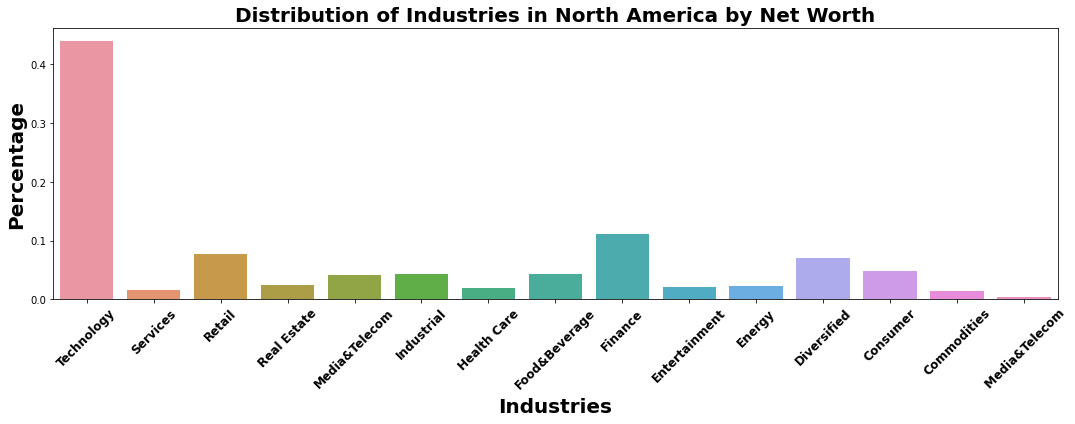

In [23]:

#graph
fig = plt.figure(figsize=(18,5))
plot = sns.barplot(data=g,x='Industry',y='PercentageOfWealth')

plt.title("Distribution of Industries in North America by Net Worth",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industries",fontsize=20,fontweight='bold')


plt.xticks(fontsize=12,fontweight='bold',rotation=45)

In [24]:
#Bilionaires in Europe

Europe = df1[df1['Country'].isin(['France', 'Spain', 'Germany','Kazakhstan', 'Italy', 'RussianFederation', 'Ireland', 'UnitedKingdom', 'Switzerland', 'Sweden', 'Netherlands', 'Greece', 'Austria','Ukraine', 'Denmark', 'Monaco', 'Norway'
 'Cayman', 'Finland' ])]

Europe.sample(10)

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
432,Petr Aven,6.68,-0.00742,0.5660,RussianFederation,Diversified
203,Dmitry Rybolovlev,11.30,-0.00638,0.8880,RussianFederation,Diversified
466,Sofie Kirk Kristiansen,6.19,-0.08500,-0.7480,Denmark,Consumer
52,Alexey Mordashov,28.80,-0.31000,5.7600,RussianFederation,Industrial
223,Stephane Bancel,10.70,-0.08370,7.4100,France,Health Care
128,Vicky Safra,16.10,0.00000,1.5500,Greece,Finance
257,Leonid Fedun,9.66,-0.09890,2.9900,RussianFederation,Energy
235,Laurent Dassault,10.20,-0.04510,2.5700,France,Diversified
366,Alain Merieux,7.55,-0.06740,-0.5750,France,Health Care
443,Joe Lewis,6.48,-0.05050,-0.0176,UnitedKingdom,Diversified


In [25]:
#groupby in terms of percentage
g1=Europe.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')
g1['PercentageOfWealth'] = g1['Total_Net_Worth_Billions(USD)']/Europe['Total_Net_Worth_Billions(USD)'].sum()
g1.head()

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
13,Technology,95.77,0.049358
12,Services,17.38,0.008957
11,Retail,227.75,0.117378
10,Real Estate,40.57,0.020909
9,Media&Telecom,26.43,0.013621


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'Media&Telecom'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Food&Beverage'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Energy'),
  Text(11, 0, 'Diversified'),
  Text(12, 0, 'Consumer'),
  Text(13, 0, 'Commodities')])

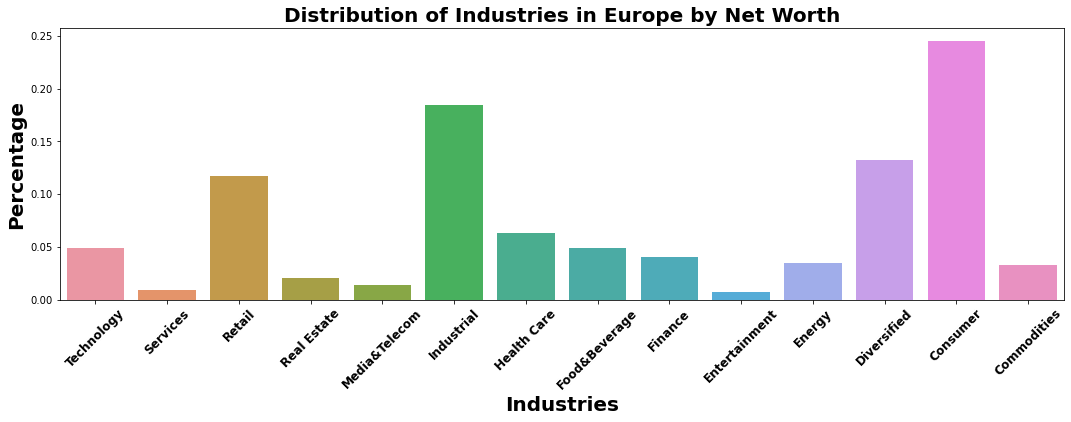

In [26]:
#graph
fig = plt.figure(figsize=(18,5))
plot = sns.barplot(data=g1,x='Industry',y='PercentageOfWealth')

plt.title("Distribution of Industries in Europe by Net Worth",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industries",fontsize=20,fontweight='bold')


plt.xticks(fontsize=12,fontweight='bold',rotation=45)

In [27]:
#Billionaires in Asia

Asia = df1[df1['Country'].isin(['India', 'China', 'HongKong','Japan','Singapore','Malaysia', 'Indonesia','Thailand', 'Taiwan', 'Korea', 'VietNam', 'Philippines', 'SouthKorea'])]
Asia.sample(5)

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
309,Yu Yong,8.42,0.1820,3.0200,China,Finance
190,Liu Jincheng,11.70,-0.0299,3.6500,China,Industrial
477,Jiang Bin,6.12,0.2100,0.0337,China,Technology
70,Radhakishan Damani,24.30,-0.2550,9.3300,India,Retail
46,Li Shu Fu,31.00,1.4700,8.8300,China,Industrial


In [28]:
#groupby in terms of percentage
g2=Asia.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')
g2['PercentageOfWealth'] = g2['Total_Net_Worth_Billions(USD)']/Europe['Total_Net_Worth_Billions(USD)'].sum()
g2.head()

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
13,Technology,585.86,0.301940
12,Services,24.80,0.012781
11,Retail,98.11,0.050564
10,Real Estate,204.83,0.105565
9,Media&Telecom,17.39,0.008962


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Services'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Real Estate'),
  Text(4, 0, 'Media&Telecom'),
  Text(5, 0, 'Industrial'),
  Text(6, 0, 'Health Care'),
  Text(7, 0, 'Food&Beverage'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Energy'),
  Text(11, 0, 'Diversified'),
  Text(12, 0, 'Consumer'),
  Text(13, 0, 'Commodities')])

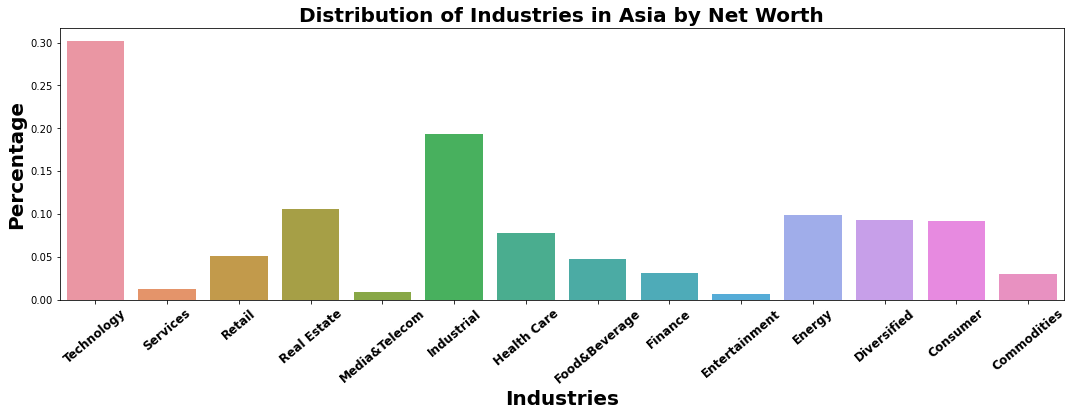

In [29]:
#graph
fig = plt.figure(figsize=(18,5))
plot = sns.barplot(data=g2,x='Industry',y='PercentageOfWealth')

plt.title("Distribution of Industries in Asia by Net Worth",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industries",fontsize=20,fontweight='bold')


plt.xticks(fontsize=12,fontweight='bold',rotation=40)

In [30]:
#Billionaires in Africa

Africa = df1[df1['Country'].isin([
 'Nigeria','SouthAfrica', 'Egypt'])]
Africa.sample(5)

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
419,Nassef Sawiris,6.87,-0.0678,0.273,Egypt,Industrial
101,Aliko Dangote,19.20,0.1190,1.410,Nigeria,Industrial
238,Johann Rupert&family,10.10,-0.1550,2.100,SouthAfrica,Diversified
337,Natie Kirsh,8.10,0.7380,1.640,SouthAfrica,Food&Beverage
331,Nicky Oppenheimer,8.15,0.0000,1.000,SouthAfrica,Diversified


In [31]:
#groupby in terms of percentage
g3=Africa.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')
g3['PercentageOfWealth'] = g3['Total_Net_Worth_Billions(USD)']/Africa['Total_Net_Worth_Billions(USD)'].sum()
g3.head()

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
2,Industrial,26.07,0.497329
1,Food&Beverage,8.10,0.154521
0,Diversified,18.25,0.348150


(array([0, 1, 2]),
 [Text(0, 0, 'Industrial'),
  Text(1, 0, 'Food&Beverage'),
  Text(2, 0, 'Diversified')])

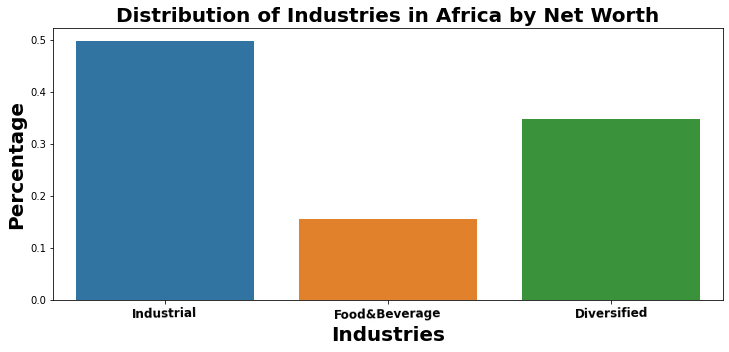

In [32]:
#graph
fig = plt.figure(figsize=(12,5))
plot = sns.barplot(data=g3,x='Industry',y='PercentageOfWealth')

plt.title("Distribution of Industries in Africa by Net Worth",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industries",fontsize=20,fontweight='bold')


plt.xticks(fontsize=12,fontweight='bold',rotation=1)

In [33]:
#Billionaires in the MiddleEast

MiddleEast = df1[df1['Country'].isin(['SaudiArabia','Israel','UAE',])]
MiddleEast

,Name,Total_Net_Worth_Billions(USD),LastChange_Billions(USD),YTDChange_Billions(USD),Country,Industry
117,Alwaleed Bin Talal,17.60,-0.04930,1.340,SaudiArabia,Diversified
191,Eyal Ofer,11.70,0.00494,1.350,Israel,Services
357,Shari Arison,7.72,-0.02390,1.170,Israel,Diversified
375,Stef Wertheimer,7.35,0.00000,0.825,Israel,Diversified
388,Mohammed Al Amoudi,7.20,-0.23300,-0.366,SaudiArabia,Energy
436,Idan Ofer,6.62,-0.00899,1.720,Israel,Energy
473,M A Yusuff Ali,6.13,-0.03060,0.702,UAE,Food&Beverage
494,Majid Al Futtaim,5.92,-0.00633,-0.686,UAE,Real Estate


In [34]:
#groupby in terms of percentage
g4=MiddleEast.groupby(by='Industry',as_index=False)['Total_Net_Worth_Billions(USD)'].sum().sort_values(ascending=False,by='Industry')
g4['PercentageOfWealth'] = g4['Total_Net_Worth_Billions(USD)']/MiddleEast['Total_Net_Worth_Billions(USD)'].sum()
g4.head()

,Industry,Total_Net_Worth_Billions(USD),PercentageOfWealth
4,Services,11.70,0.166572
3,Real Estate,5.92,0.084282
2,Food&Beverage,6.13,0.087272
1,Energy,13.82,0.196754
0,Diversified,32.67,0.465120


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Services'),
  Text(1, 0, 'Real Estate'),
  Text(2, 0, 'Food&Beverage'),
  Text(3, 0, 'Energy'),
  Text(4, 0, 'Diversified')])

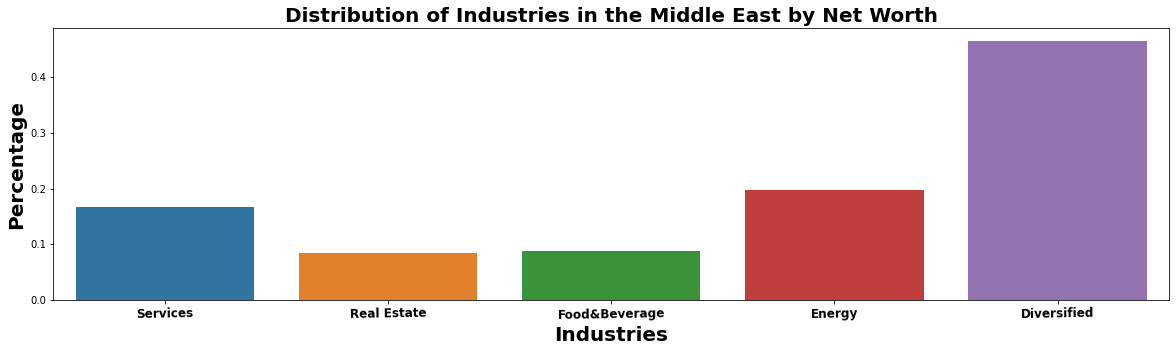

In [35]:
#graph
fig = plt.figure(figsize=(20,5))
plot = sns.barplot(data=g4,x='Industry',y='PercentageOfWealth')

plt.title("Distribution of Industries in the Middle East by Net Worth",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industries",fontsize=20,fontweight='bold')


plt.xticks(fontsize=12,fontweight='bold',rotation=1)